> Objective of the Project: Predicting whether the shipped products were delivered on time, using different Machine Learning
 Algorithms.

> Context of the Project: An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products. Here our moto is to predict if the order was delivered on time.

> Variables to work with:
1. ID: ID Number of Customers.
2. Warehouse block:- The Company have big Warehouse which is divided in to  
block such as A,B,C,D,E.
3. Mode of shipment:-The Company Ships the products in multiple way such as Ship, Flight and Road.
4. Customer care calls:- The number of calls made from enquiry for enquiry of the shipment.
5. Customer rating:- The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product-: Cost of the Product in US Dollars.
7. Prior purchases:- The Number of Prior Purchase.
8. Product importance:- The company has categorized the product in the various parameter such as low, medium, high.
9. Gender:- Male and Female.
10. Discount offered:- Discount offered on that specific product.
11. Weight in gms:- It is the weight in grams.
12. Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# We will import the dataset for project
path='/content/drive/MyDrive/Data Science/Capstone project/E-Commerce-20240608T020715Z-001/E-Commerce/E_Commerce.csv'
df=pd.read_csv(path)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# We need to see the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [ ]:
# We can clearly see there are no Null values, however there can be duplicates
df.duplicated().sum()

0

In [ ]:
# There are no duplicates, now lets look at the description about the dataset
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
# Part 2
## Since we are done with initial part we can move on to EDA part



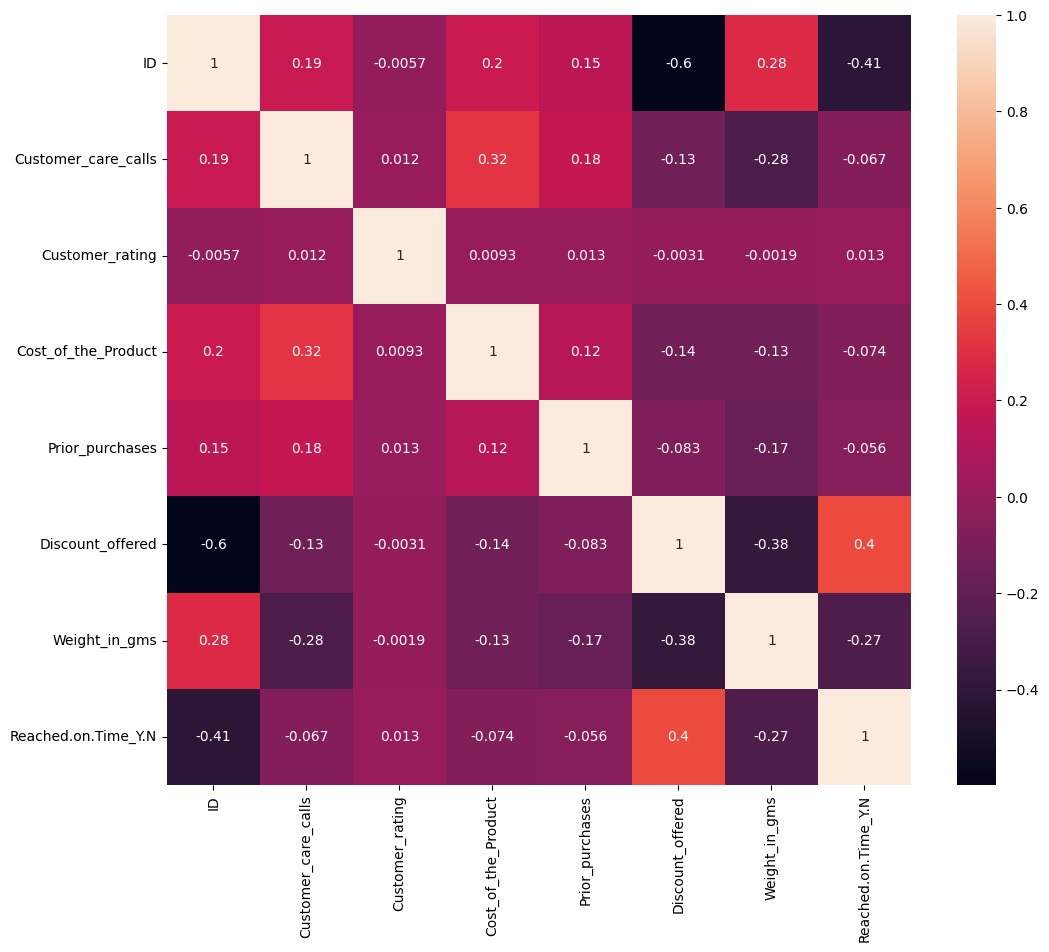

In [ ]:
# 1. Heatmap to check for relation between the columns with numerical values and target variable
plt.figure(figsize=(12,10))
# Convert columns to numeric if possible, or select only numeric columns
numeric_df = df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
sns.heatmap(numeric_df.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

> Conclusions from Correlation matrix :-

1. Discount Offered have high positive correlation with Reached on Time or Not of 40%.
2. Discount Offered and weights in grams have negative correlation -38%.
3.  Customer care calls and weights in grams havenegative correlation -28%.
4. Customer care calls and cost of the product have positive correlation of 32%.
5.  Prior Purchases and Customer care calls have slightly positive correlation.

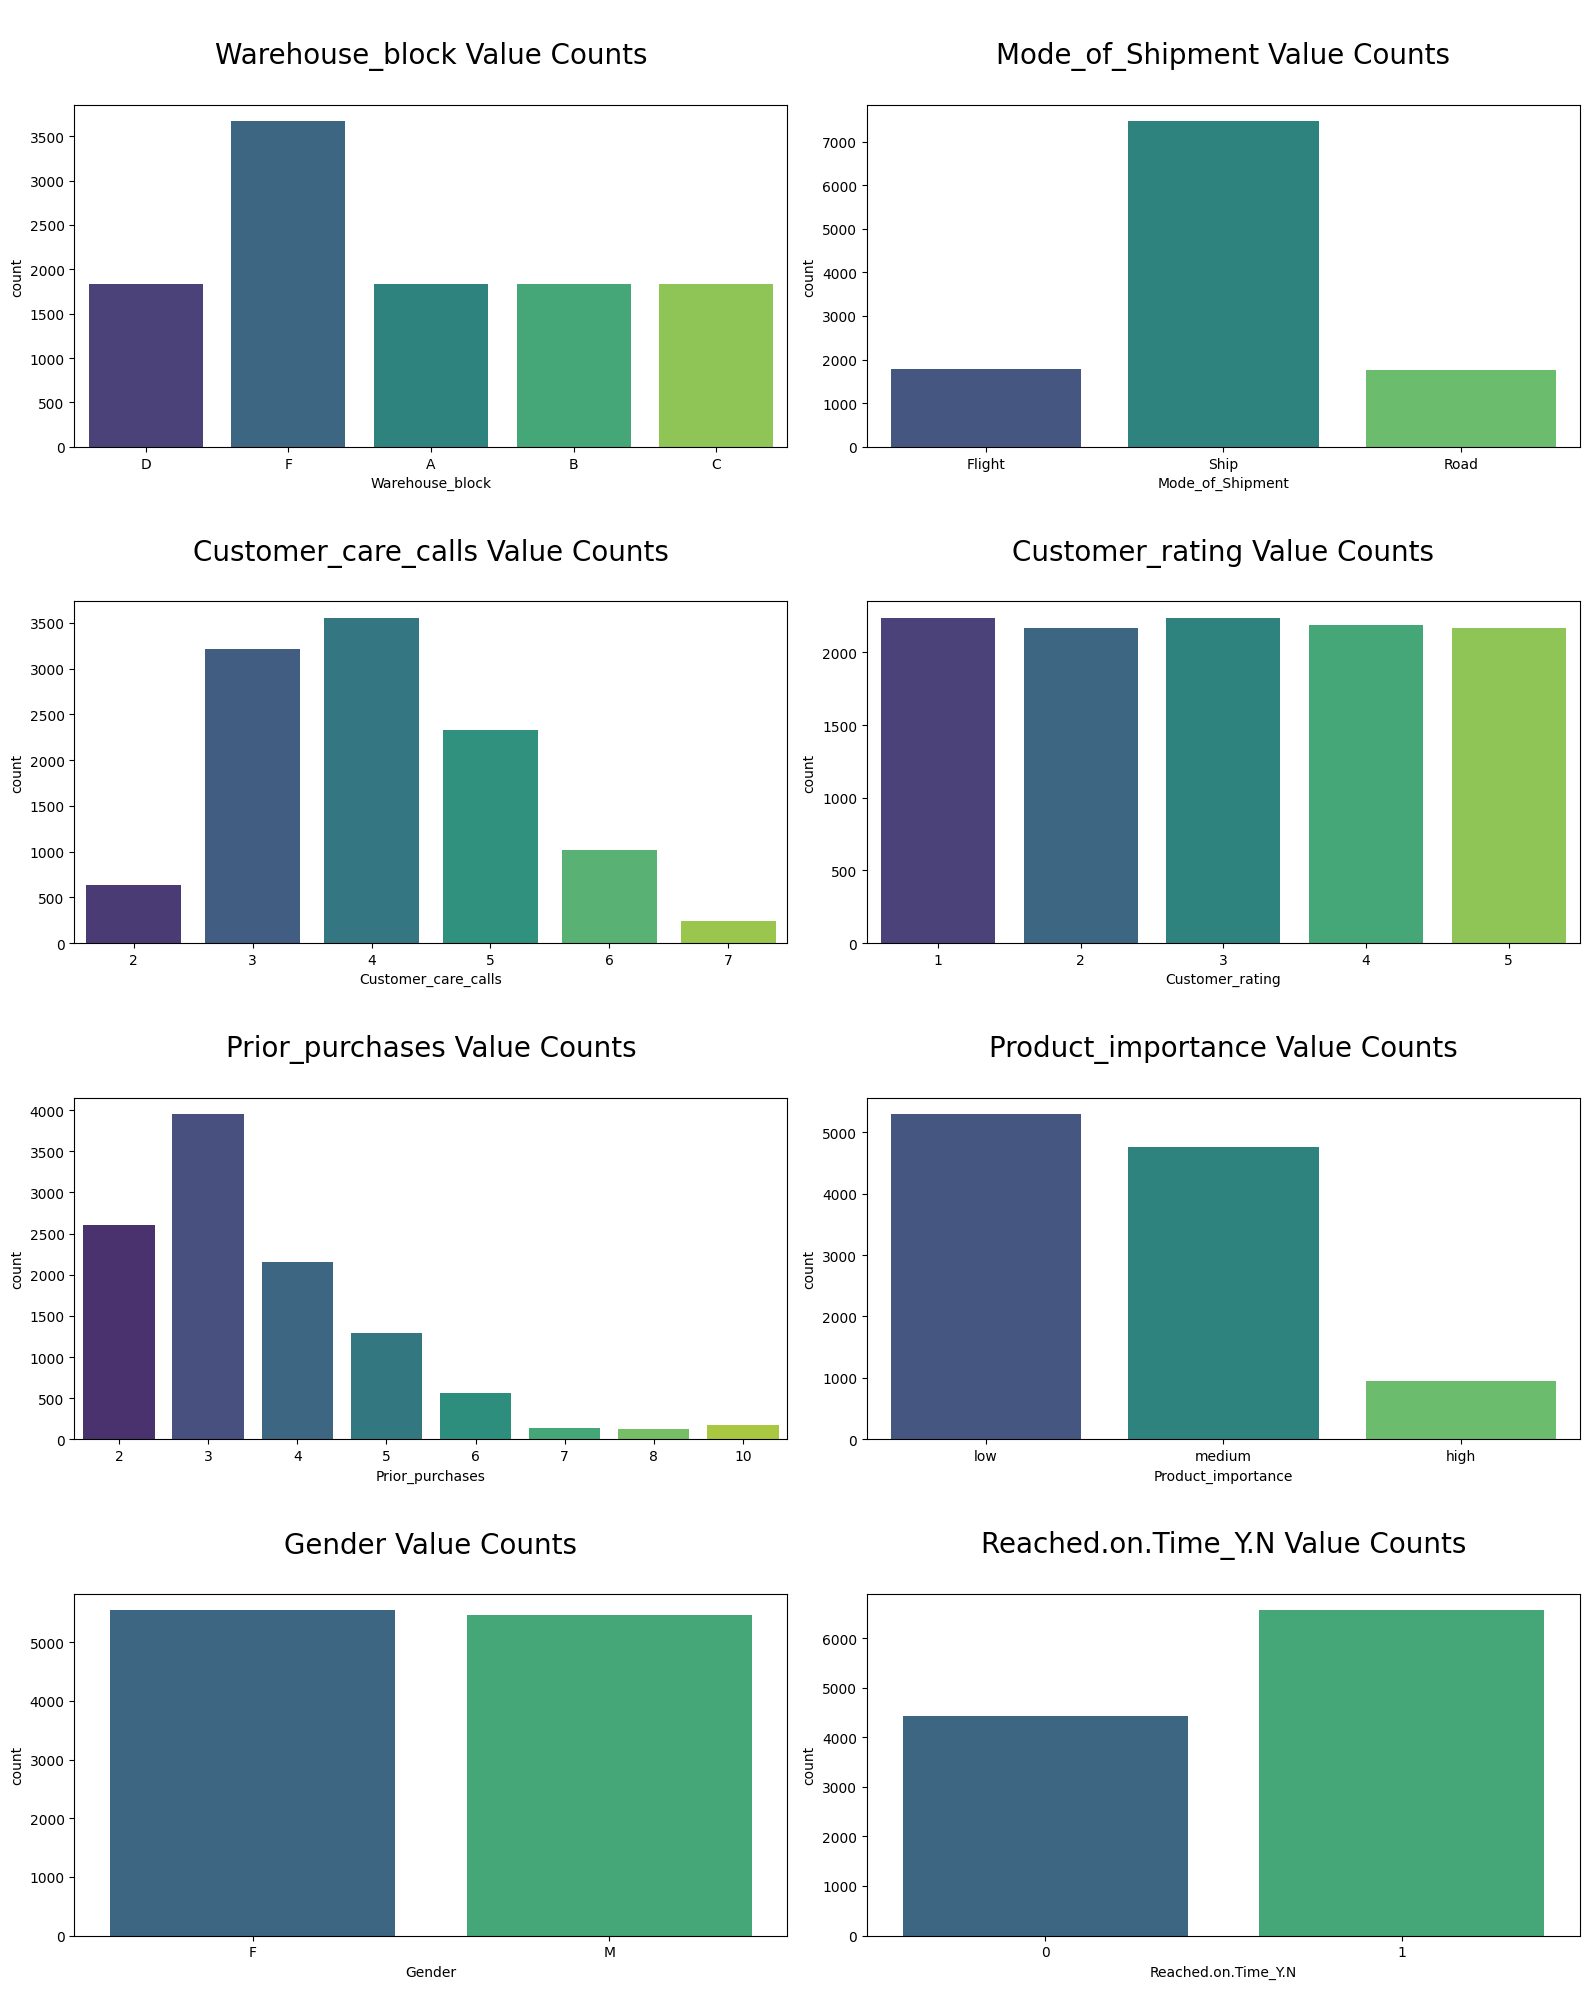

In [ ]:
# 2 We are lookin at the counts of each categories in the categorical columns
# Creating a list of categorical coumns
columns = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1

# Plotting the countplot of each categorical column.

for i in range(len(columns)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = columns[i], data = df, ax = ax, palette='viridis')
        plt.title(f"\n{columns[i]} Value Counts\n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

> Conclusions from the countplot graphs

1. Warehouse block F have has highest number of products.
2. Ship is the mode of transport used for maximum number of products.
3. On an average a customer calls for customer care around 4 times
4. Customer ratings does not have much variations
5. Most customers had prior purchase 3 times
6. Most of the product purchased are of low importance followed by midium and high
7. Not such variations are there for gender column
8. Most of the products have reached on time.

In [ ]:
# Using Label encoding to convert Categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode the categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])





In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [ ]:
df=df.drop(['ID'],axis=1)

In [ ]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


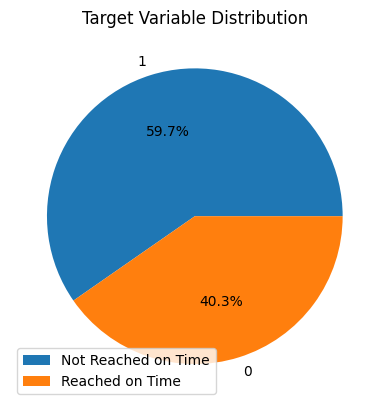

In [ ]:
# Pie chart to analyze the target variable
target_counts = df['Reached.on.Time_Y.N'].value_counts()

# Create a pie chart using matplotlib.pyplot.pie
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Variable Distribution')
plt.legend(['Not Reached on Time', 'Reached on Time']) # Here 0 represents 'Not Reached' and 1 represents 'Reached'
plt.figsize=(16,12)
plt.show()

In [ ]:
# Aroung 60 percent of the entire products are shipped on time

In [ ]:
# Splitting data into X and y
X=df.drop(['Reached.on.Time_Y.N'],axis=1)   # independent variables (features)
y=df['Reached.on.Time_Y.N']  # dependent variable (target variable)

In [ ]:
# Feature Scaling
## Normalizing the independent variable (X) using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 0.4471892  -2.00415767 -0.04771132 ... -0.99176046  1.88998336
  -1.46823975]
 [ 1.11803399 -2.00415767 -0.04771132 ...  1.00830799  2.81563557
  -0.33389333]
 [-1.56534517 -2.00415767 -1.79988745 ...  1.00830799  2.13682395
  -0.15900218]
 ...
 [-0.22365559  0.63834175  0.82837675 ... -0.99176046 -0.57842252
  -1.51593733]
 [ 1.11803399  0.63834175  0.82837675 ...  1.00830799 -0.70184282
  -1.48230442]
 [ 0.4471892   0.63834175 -1.79988745 ... -0.99176046 -0.45500223
  -1.2199677 ]]


In [ ]:
# Split the data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

In [ ]:
# 1. Using Logistic regression for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(X_test)
model_accuracy  = accuracy_score(y_pred,y_test)
print("The Accuracy of simple logistic regression without hyperparmeter:",model_accuracy)


The Accuracy of simple logistic regression without hyperparmeter: 0.6409090909090909


In [ ]:
# Without applying hyperparameters the model accuracy is 64.09%. Now applying the hyperparameters using GridSearchCV technique which is used to find the best possible accuracy
from sklearn.model_selection import GridSearchCV
param_grid={
    'penalty':['l1','l2','elasticnet'],
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search=GridSearchCV(log_model,param_grid,cv=5)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
grid_search=grid_search.fit(X_train,y_train)
grid_search.best_estimator_

LogisticRegression(C=0.001, solver='liblinear')

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.6506427334745981


In [ ]:
# After using GridSearchCV the accuracy of the model only rose to 65.06%

In [ ]:
# 2. Now using ExtremeGradientBoosting to chech wheather we can boost up the accuracy of the model
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb

model = XGBClassifier()
param_grid1={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[3,4,5,6,7],
    'learning_rate':[0.001,0.01,0.1,1.0,10]
}
grid_search1=GridSearchCV(model,param_grid1,cv=5,n_jobs=-1, verbose=1)
grid_search1


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [ ]:
grid_search1=grid_search1.fit(X_train,y_train)
grid_search1.best_estimator_


Fitting 5 folds for each of 125 candidates, totalling 625 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(f"Best Parameters: {grid_search1.best_params_}")
print(f"Best Score: {grid_search1.best_score_}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Score: 0.6851916119696109


In [ ]:
# After using XGBClassifier and hypertuning it with GridsearchCV we got a better accuracy of 68.51%

In [ ]:
# 3. Now using decision tree classier if we can get a better accuracy
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred1 = dt_model.predict(X_test)
model_accuracy1  = accuracy_score(y_pred1,y_test)
print("The Accuracy of Decision Tree Classifier:",model_accuracy1)

The Accuracy of Decision Tree Classifier: 0.63


In [ ]:
# The decision tree classifier shows a better accuracy than Logistic regression model, now applying hypertuning paramets over this mode
param_grid2={
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4]
}
grid_search2=GridSearchCV(dt_model,param_grid2,cv=5)
grid_search2

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [ ]:
grid_search2=grid_search2.fit(X_train,y_train)
grid_search2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [ ]:
print(f"Best Parameters: {grid_search2.best_params_}")
print(f"Best Score: {grid_search2.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score: 0.6859868727065997


In [ ]:
# Using random search instead of grid search
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from scipy.stats import randint as sp_randint
random_search = RandomizedSearchCV(dt_model, param_distributions=param_grid2, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5]})

In [ ]:
param_grid3={
    'criterion':['gini','entropy'],
    'max_depth':sp_randint(3,10),
    'min_samples_split':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,10)
}
random_search1=RandomizedSearchCV(dt_model,param_grid3,cv=5)
random_search1

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d45c5e5bc70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d461055bd00>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d45c61d6e00>})

In [ ]:
random_search1=random_search1.fit(X_train,y_train)
random_search1.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=8)

In [ ]:
print(f"Best Parameters: {random_search1.best_params_}")
print(f"Best Score: {random_search1.best_score_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 8}
Best Score: 0.6848504444674143


In [ ]:
# 4. Using SVM if we get a better accuracy
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)
model_accuracy3 = accuracy_score(y_pred3,y_test)
print("The Accuracy of SVM:",model_accuracy3)

The Accuracy of SVM: 0.6586363636363637


In [ ]:
# Support vector Classifier provides a accuracy of 65.86%, now using GridSearchCV for hyperparameter tuning if we can get a better accuracy
param_grid4={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'gamma':['scale','auto'],
    'kernel':['linear','poly','rbf','sigmoid'],
}
grid_search3=GridSearchCV(model,param_grid4,cv=5)
grid_search3

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
grid_search3=grid_search2.fit(X_train,y_train)
grid_search3.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [ ]:
print(f"Best Parameters: {grid_search3.best_params_}")
print(f"Best Score: {grid_search3.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score: 0.6859868727065997


Conclusion: After using different Machine Learning Algorithms and Hypertuning we got almost similar accuracy in each cases.
1. Logistic Regression and Hypertuning it with GridSearchCV we got an accuracy of 65.06%
2. XGBClassifier and Hypertuning it with GridSearchCV we got an accuracy of
68.5%
3. Decision Tree Classifier and Hypertuning it with GridSearchCV we got an accuracy of 68.59% also using RandomizedSearchCV we got accuracy of 68.48%.
4. Finally with SVM and hypertuning it with GridSearchCV we got an accuracy of 68.59%.

Since, Every Algoriths providing similar accuracy. With highest test accuracy of about 68.59% , SVM and Decision Tree Classifier can be prefered model here for provided dataset.